In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
train_df = pd.read_excel('Data_Train.xlsx')

In [93]:
test_df=pd.read_excel('Test_set.xlsx')

In [94]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [95]:
combined_df = train_df.append(test_df,sort=False)

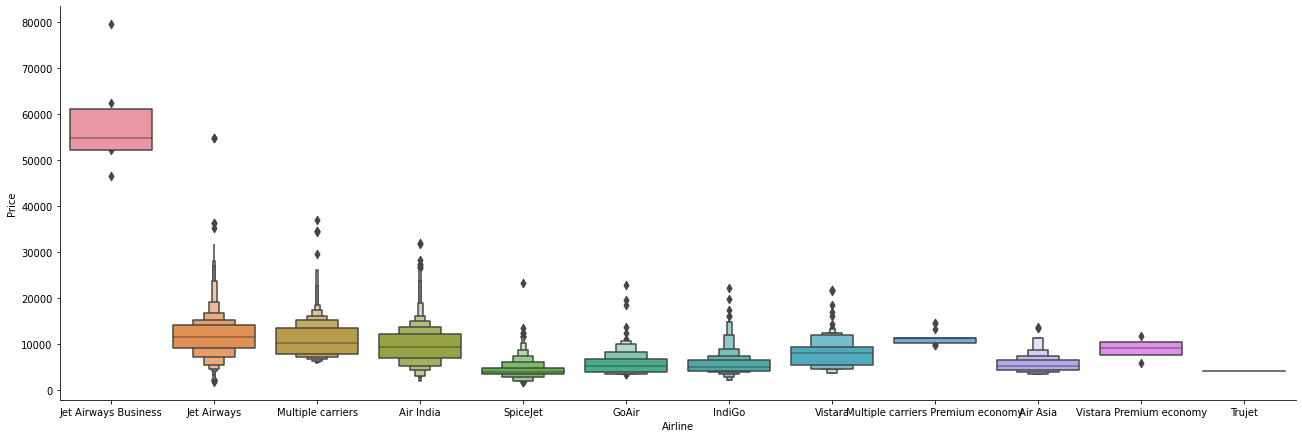

In [96]:
# Airline vs Price # airline is also an importtant feature
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

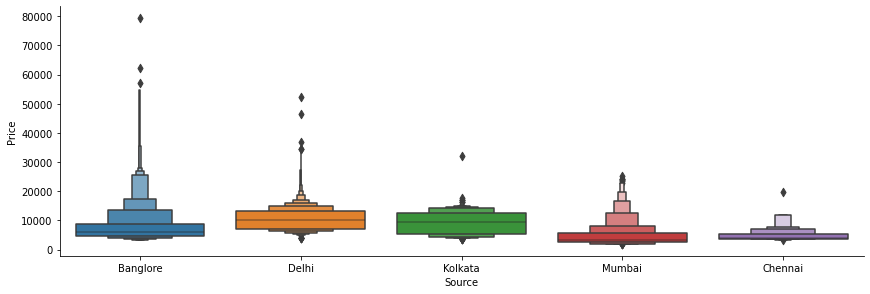

In [97]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [98]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


# Feature Engineering

In [99]:
combined_df['Date'] = combined_df['Date_of_Journey'].str.split('/').str[0].astype(int)
combined_df['Month'] = combined_df['Date_of_Journey'].str.split('/').str[1].astype(int)
combined_df['Year'] = combined_df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [100]:
combined_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [101]:
combined_df = combined_df.drop(columns = 'Date_of_Journey')
combined_df['Arrival_Time'] = combined_df['Arrival_Time'].str.split(' ').str[0]

In [102]:
combined_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,NaN,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,NaN,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [103]:
combined_df[combined_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [104]:
combined_df['Total_Stops'] = combined_df['Total_Stops'].fillna('2 stops') #23hr flight just a wild guess
combined_df['Total_Stops'] = combined_df['Total_Stops'].replace('non-stop','0 stop')
combined_df['Total'] = combined_df['Total_Stops'].str.split(' ').str[0].astype(int)
combined_df = combined_df.drop(['Total_Stops'], axis = 1)


In [105]:
combined_df['Arrival_Hour'] = combined_df['Arrival_Time'] .str.split(':').str[0].astype(int)
combined_df['Arrival_Minute'] = combined_df['Arrival_Time'] .str.split(':').str[1].astype(int)
combined_df = combined_df.drop(['Arrival_Time'], axis=1)

In [106]:
combined_df['Departure_Hour'] = combined_df['Dep_Time'] .str.split(':').str[0].astype(int)
combined_df['Departure_Minute'] = combined_df['Dep_Time'] .str.split(':').str[1].astype(int)
combined_df = combined_df.drop(['Dep_Time'], axis=1)

In [107]:
combined_df['Price'].fillna((combined_df['Price'].mean()),inplace=True)

In [108]:
combined_df

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Total,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.000000,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.000000,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.000000,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.000000,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.000000,1,3,2019,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,No info,9087.064121,6,6,2019,1,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,No info,9087.064121,27,3,2019,0,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,No info,9087.064121,6,3,2019,1,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,No info,9087.064121,6,3,2019,1,19,15,4,0


In [109]:
combined_df['place1'] = combined_df['Route'].str.split('→ ').str[0]
combined_df['place2'] = combined_df['Route'].str.split('→ ').str[1]
combined_df['place3'] = combined_df['Route'].str.split('→ ').str[2]
combined_df['place4'] = combined_df['Route'].str.split('→ ').str[3]
combined_df['place5'] = combined_df['Route'].str.split('→ ').str[4]

In [110]:
combined_df['place1'].fillna("None",inplace=True)
combined_df['place2'].fillna("None",inplace=True)
combined_df['place3'].fillna("None",inplace=True)
combined_df['place4'].fillna("None",inplace=True)
combined_df['place5'].fillna("None",inplace=True)

In [111]:
combined_df = combined_df.drop(['Route'], axis=1)
combined_df = combined_df.drop(['Duration'], axis=1)

In [112]:
combined_df

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Total,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,place1,place2,place3,place4,place5
0,IndiGo,Banglore,New Delhi,No info,3897.000000,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.000000,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.000000,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.000000,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.000000,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,No info,9087.064121,6,6,2019,1,20,25,20,30,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,No info,9087.064121,27,3,2019,0,16,55,14,20,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,No info,9087.064121,6,3,2019,1,4,25,21,50,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,No info,9087.064121,6,3,2019,1,19,15,4,0,DEL,BOM,COK,None,None


In [113]:
combined_df.dtypes

Airline              object
Source               object
Destination          object
Additional_Info      object
Price               float64
Date                  int32
Month                 int32
Year                  int32
Total                 int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
place1               object
place2               object
place3               object
place4               object
place5               object
dtype: object

In [114]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
combined_df["Airline"] = encoder.fit_transform(combined_df['Airline'])
combined_df["Source"] = encoder.fit_transform(combined_df['Source'])
combined_df["Destination"] = encoder.fit_transform(combined_df['Destination'])
combined_df["Additional_Info"] = encoder.fit_transform(combined_df['Additional_Info'])
combined_df["place1"] = encoder.fit_transform(combined_df['place1'])
combined_df["place2"] = encoder.fit_transform(combined_df['place2'])
combined_df["place3"] = encoder.fit_transform(combined_df['place3'])
combined_df["place4"] = encoder.fit_transform(combined_df['place4'])
combined_df["place5"] = encoder.fit_transform(combined_df['place5'])

In [115]:
combined_df

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Total,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,place1,place2,place3,place4,place5
0,3,0,5,8,3897.000000,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.000000,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.000000,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.000000,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.000000,1,3,2019,1,21,35,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,8,9087.064121,6,6,2019,1,20,25,20,30,2,14,3,12,4
2667,3,3,0,8,9087.064121,27,3,2019,0,16,55,14,20,2,5,24,12,4
2668,4,2,1,8,9087.064121,6,3,2019,1,4,25,21,50,3,7,6,12,4
2669,1,2,1,8,9087.064121,6,3,2019,1,19,15,4,0,3,7,6,12,4


In [116]:
combined_df.dtypes

Airline               int32
Source                int32
Destination           int32
Additional_Info       int32
Price               float64
Date                  int32
Month                 int32
Year                  int32
Total                 int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
place1                int32
place2                int32
place3                int32
place4                int32
place5                int32
dtype: object

# Train test split

In [117]:
df_train = combined_df[0:10683]
df_test = combined_df[10683:]

In [118]:
x = df_train.drop(['Price'], axis = 1)
y = df_train['Price']

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

# Feature importance

In [120]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(Lasso(alpha=0.005,random_state=0)) #alpha can vary #can use Extratrees regressors also for feature importance

In [121]:
model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [124]:
selected_features = x_train.columns[(model.get_support())] #get support tells us which features have been selected
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Total', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'place1', 'place2', 'place3', 'place4', 'place5'],
      dtype='object')

In [125]:
#year is not included so droping year from x_train
x_train = x_train.drop(['Year'],axis=1)
x_test = x_test.drop(['Year'],axis=1)

In [126]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

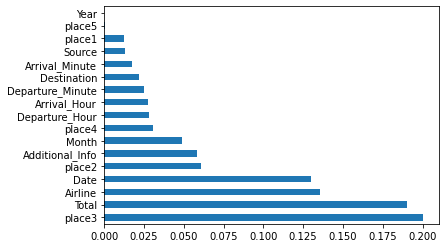

In [127]:
#plot graph of feature importances for better visualization
plt.figure()
feat_importances = pd.Series(selection.feature_importances_, index = x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Hyper-parameter tuning on random forest

In [129]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor?

In [130]:
from sklearn.model_selection import RandomizedSearchCV #faster than grid-searchcv
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] #no trees
max_features = ['auto', 'sqrt'] #features
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)] #depth
min_samples_split = [2, 5, 10, 15, 100] #for splitting a node
min_samples_leaf = [1, 2, 5, 10] #samples at leaf node

In [131]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [133]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid
                               ,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)

In [134]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   2.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   2.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   2.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   2.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  10.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  10.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  10.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  10.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  10.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=15, max_feature

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [135]:
y_pred = rf_random.predict(x_test)

In [140]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [141]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 680.4202133370578
MSE: 2651100.304595425
RMSE: 1628.219980406648


c:\users\ameya gupta\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

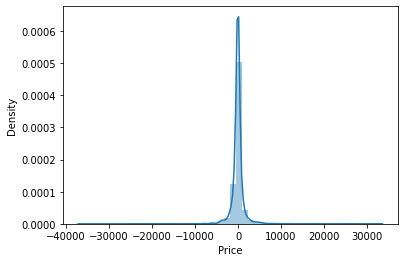

In [142]:
sns.distplot(y_test-y_pred)

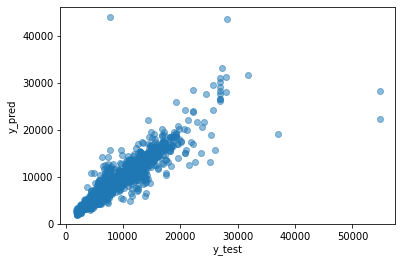

In [143]:
plt.figure()
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Preserving the rf_random regressor

In [144]:
import pickle
file = open('rf_flight.pkl', 'wb')
pickle.dump(rf_random, file)
file.close()

In [145]:
#metrics.r2_score(y_test, y_pred)

0.8691231566511952